In [1]:
# import pickle
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import (Input, Dropout, LSTM, Reshape, LeakyReLU,
#                           Concatenate, ReLU, Flatten, Dense, Embedding,
#                           BatchNormalization, Activation, SpatialDropout1D,
#                           Conv2D, MaxPooling2D, Softmax, 
#                            Lambda)
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.optimizers import Adam, RMSprop
# import tensorflow.keras.backend as K
# from tensorflow.keras.activations import tanh
# from progressbar import ProgressBar



import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import tensorflow as tf

from tensorflow import keras
import random
import numpy as np
from numpy import ndarray
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pickle

from tensorflow.keras.layers import (Input, Dropout, LSTM, Reshape, LeakyReLU,
                          Concatenate, ReLU, Flatten, Dense, Embedding,
                          BatchNormalization, Activation, SpatialDropout1D,
                          Conv2D, MaxPooling2D, Softmax, 
                           Lambda)
#from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow.keras.backend as K
from tensorflow.keras.activations import tanh

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#import np_utils
from tensorflow.keras.utils import to_categorical
from IPython.display import clear_output
import matplotlib.pyplot as plt
import csv
from progressbar import ProgressBar
import seaborn as sns
from tensorflow import random as randomtf
from tensorflow.keras.backend import argmax as argmax

from tensorflow import one_hot
from rdkit import rdBase
rdBase.DisableLog('rdApp.error')
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from rdkit import Chem
from sklearn.metrics import r2_score

randomtf.set_seed(1)
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
random.seed(12345)
import matplotlib as mpl
from matplotlib import rc, rcParams

In [2]:
tf.__version__
print(tf.config.list_physical_devices())

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [3]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.7)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1, gpu_options=gpu_options)
tf.compat.v1.set_random_seed(1234)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
tf.compat.v1.keras.backend.clear_session()

In [4]:
# physical_devices = tf.config.list_physical_devices('GPU')
# if physical_devices:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
with open(r'D:\Studies\PHD\Research\Study\Study 4.1\Project\DataProcessing\CanonicalSmiles.pickle', 'rb') as f:
        X, SMILES, Y = pickle.load(f)
        
X.shape
X = X.reshape(209301, 60, 35, 1)
X.shape

Y = Y.astype(float)
X = X.astype(float)

In [6]:
X.shape
X = X.reshape(209301, 60, 35, 1)
X.shape

(209301, 60, 35, 1)

In [7]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test, SMILES_train, SMILES_test = train_test_split(X, Y, SMILES , test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
# x_val, x_test, y_val, y_test, SMILES_train, SMILES_test= train_test_split(x_test, y_test, SMILES_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [8]:
print(x_train.shape)
print(x_test.shape)

(156975, 60, 35, 1)
(52326, 60, 35, 1)


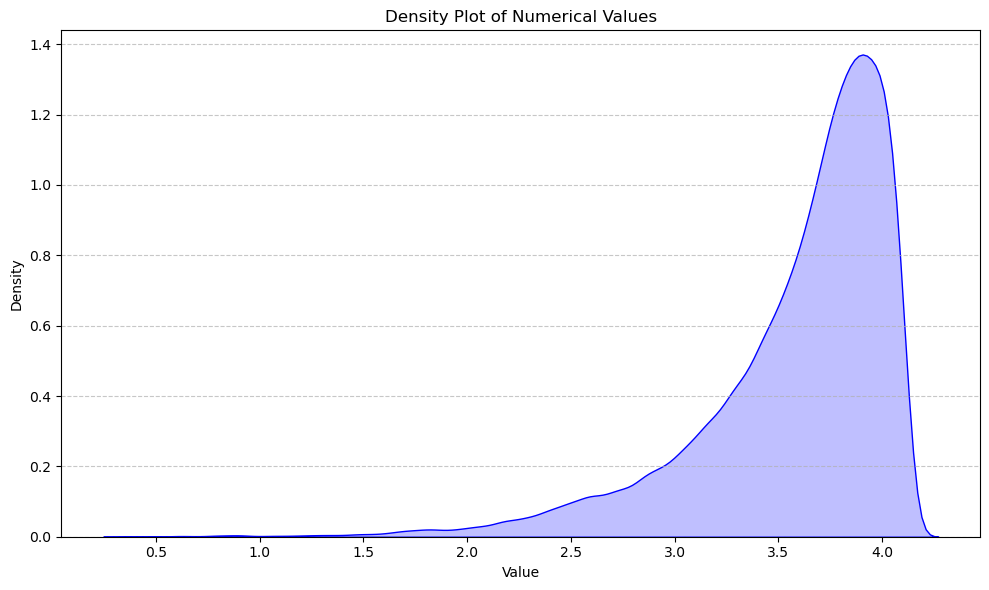

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting numerical values
values = y_train

plt.figure(figsize=(10, 6))
sns.kdeplot(values, fill=True, color='blue')
plt.title('Density Plot of Numerical Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
X_smiles_train0, SMILES_train0, y_train00 = x_train.copy(), SMILES_train.copy(), y_train.copy()
X_smiles_test0, SMILES_test0, y_test_real = x_test.copy(), SMILES_test.copy(), y_test.copy()

In [11]:
# normalize the gap value between [0-11]

y_train1 = (y_train00 - 0) / 4.5
y_test1 = (y_test - 0) / 4.5

print ('min norm', min(y_train1))
print ('min ', min(y_train00))
print ('max norm', max(y_train1))
print ('max ', max(y_train00))

print (min(y_test1))
print (min(y_test))
print (max(y_test1))
print (max(y_test))

min norm 0.08344824748666664
min  0.3755171136899999
max norm 0.9203495121355556
max  4.14157280461
0.12033479166555544
0.5415065624949995
0.9203495121355557
4.141572804610001


In [12]:
# Encoding to an image embedding
# ENCODER
inp_1 = Input(shape = [60, 35, 1])

y1 = Conv2D(64, (35, 10), strides = 1, padding = 'valid')(inp_1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

# print(y1.shape)

# y1 = Conv2D(64, (23, 15), strides = 1, padding = 'valid')(y1)
# y1 = LeakyReLU(alpha = 0.2)(y1)
# y1 = BatchNormalization()(y1)

print(y1.shape)

y1 = Conv2D(64, 7, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1 = Conv2D(64, 5, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1 = Conv2D(64, 4, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1 = Conv2D(64, 4, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1 = Conv2D(64, 3, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1 = Conv2D(64, 3, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1_emb = Conv2D(1, 3, strides = 1, padding = 'same',
            activation = 'tanh')(y1)

y2 = Conv2D(64, (35, 10), strides = 1, padding = 'valid')(inp_1)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 7, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 5, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 4, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 4, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 3, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 3, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2_emb = Conv2D(1, 3, strides = 1, padding = 'same',
                activation = 'tanh')(y2)

####
y_out = Concatenate()([y1_emb, y2_emb])

print('latent',y_out.shape)
# DECODER
emb_in = Input(shape = [6, 6, 2])

tower0 = Conv2D(32, 1, padding = 'same')(emb_in)
tower1 = Conv2D(64, 1, padding = 'same')(emb_in)
tower1 = Conv2D(64, 3, padding = 'same')(tower1)
tower2 = Conv2D(32, 1, padding = 'same')(emb_in)
tower2 = Conv2D(32, 5, padding = 'same')(tower2)
tower3 = MaxPooling2D(3, 1, padding = 'same')(emb_in)
tower3 = Conv2D(32, 1, padding = 'same')(tower3)
h = Concatenate()([tower0, tower1, tower2, tower3])
h = ReLU()(h)
h = MaxPooling2D(2, 1, padding = 'same')(h)

for i in range(6):
    tower0 = Conv2D(32, 1, padding = 'same')(h)
    tower1 = Conv2D(64, 1, padding = 'same')(h)
    tower1 = Conv2D(64, 3, padding = 'same')(tower1)
    tower2 = Conv2D(32, 1, padding = 'same')(h)
    tower2 = Conv2D(32, 5, padding = 'same')(tower2)
    tower3 = MaxPooling2D(3, 1, padding = 'same')(h)
    tower3 = Conv2D(32, 1, padding = 'same')(tower3)
    h = Concatenate()([tower0, tower1, tower2, tower3])
    h = ReLU()(h)
    if i % 2 == 0 and i != 0:
        h = MaxPooling2D(2, 1, padding = 'same')(h)
h = BatchNormalization()(h)

y = Flatten()(h)

y = Dense(2048, activation = 'relu')(y)
y_cv = Dense(64, activation = 'relu')(y)
y = Dropout(0.2)(y)
y = Dense(1024, activation = 'relu')(y)
y = Dropout(0.2)(y)
y = Dense(512, activation = 'sigmoid')(y)
y = Dropout(0.2)(y)
y = Dense(60 * 35)(y)
y = Reshape([60, 35, 1])(y)
y = Softmax(axis = 2)(y)


y_cv = Dropout(0.2)(y_cv)
y_cv = Dense(128, activation = 'relu')(y_cv)
y_cv = Dropout(0.2)(y_cv)
y_cv = Dense(128, activation = 'relu')(y_cv)
y_cv = Dense(1, activation = 'sigmoid')(y_cv)

encoder = Model([inp_1], [y1_emb, y2_emb, y_out], name = 'Encoder')
decoder = Model(emb_in, [y, y_cv], name = 'Decoder')
outputs = decoder(encoder([inp_1])[2])
model = Model(inp_1, outputs, name = 'ae')
print (model.summary())

(None, 26, 26, 64)
latent (None, 6, 6, 2)
Model: "ae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 35, 1)]       0         
                                                                 
 Encoder (Functional)        [(None, 6, 6, 1),         1066242   
                              (None, 6, 6, 1),                   
                              (None, 6, 6, 2)]                   
                                                                 
 Decoder (Functional)        [(None, 60, 35, 1),       16248501  
                              (None, 1)]                         
                                                                 
Total params: 17,314,743
Trainable params: 17,312,631
Non-trainable params: 2,112
_________________________________________________________________
None


In [ ]:
from keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Concatenate, Flatten, Dense, Dropout, Reshape, Softmax, MaxPooling2D, ReLU
from keras.models import Model

# ENCODER
inp_1 = Input(shape=[60, 35, 1])

# y1 path
y1 = Conv2D(64, (27, 2), strides=1, padding='valid')(inp_1)
y1 = LeakyReLU(alpha=0.2)(y1)
y1 = BatchNormalization()(y1)


for _ in range(14): # Adding one more Conv layer
    print(y1.shape)
    y1 = Conv2D(64, 3, strides=1, padding='valid')(y1)
    y1 = LeakyReLU(alpha=0.2)(y1)
    y1 = BatchNormalization()(y1)

y1_emb = Conv2D(1, 3, strides=1, padding='same', activation='tanh')(y1)

# y2 path
y2 = Conv2D(64, (27, 2), strides=1, padding='valid')(inp_1)
y2 = LeakyReLU(alpha=0.2)(y2)
y2 = BatchNormalization()(y2)

for _ in range(14): # Adding one more Conv layer
    y2 = Conv2D(64, 3, strides=1, padding='valid')(y2)
    y2 = LeakyReLU(alpha=0.2)(y2)
    y2 = BatchNormalization()(y2)

y2_emb = Conv2D(1, 3, strides=1, padding='same', activation='tanh')(y2)

y_out = Concatenate()([y1_emb, y2_emb])

print(y_out.shape)
# DECODER
emb_in = Input(shape=[6, 6, 2])

# First inception-like module
tower0 = Conv2D(32, 1, padding='same')(emb_in)
print('tower0',tower0.shape)
tower1 = Conv2D(64, 1, padding='same')(emb_in)
print('tower1',tower1.shape)
tower1 = Conv2D(64, 3, padding='same')(tower1)
print('tower1',tower1.shape)
tower2 = Conv2D(32, 1, padding='same')(emb_in)
print('tower2',tower2.shape)
tower2 = Conv2D(32, 5, padding='same')(tower2)
print('tower2',tower2.shape)
tower3 = MaxPooling2D(3, 1, padding='same')(emb_in)
print('tower3',tower3.shape)
tower3 = Conv2D(32, 1, padding='same')(tower3)
print('tower3',tower3.shape)
h = Concatenate()([tower0, tower1, tower2, tower3])
print('h',h.shape)
h = ReLU()(h)
print('hrelu',h.shape)

# Adding extra inception-like modules for increased complexity
for i in range(14):
    tower0 = Conv2D(32, 1, padding='same')(h)
    tower1 = Conv2D(64, 1, padding='same')(h)
    tower1 = Conv2D(64, 3, padding='same')(tower1)
    tower2 = Conv2D(32, 1, padding='same')(h)
    tower2 = Conv2D(32, 5, padding='same')(tower2)
    tower3 = MaxPooling2D(3, 1, padding='same')(h)
    tower3 = Conv2D(32, 1, padding='same')(tower3)
    h = Concatenate()([tower0, tower1, tower2, tower3])
    h = ReLU()(h)
    if i % 2 == 0:
        h = MaxPooling2D(2, 1, padding='same')(h)

h = BatchNormalization()(h)
print('hbnor',h.shape)
# Flatten and dense layers
y = Flatten()(h)
y = Dense(2048, activation='relu')(y)
y_cv = Dense(64, activation='relu')(y)
y = Dropout(0.2)(y)
y = Dense(1024, activation='relu')(y)
y = Dropout(0.2)(y)
y = Dense(512, activation='sigmoid')(y)
y = Dropout(0.2)(y)
y = Dense(60 * 35)(y)
y = Reshape([60, 35, 1])(y)
y = Softmax(axis=2)(y)

y_cv = Dropout(0.2)(y_cv)
y_cv = Dense(128, activation='relu')(y_cv)
y_cv = Dropout(0.2)(y_cv)
y_cv = Dense(128, activation='relu')(y_cv)
y_cv = Dense(1, activation='sigmoid')(y_cv)

encoder = Model(inp_1, [y1_emb, y2_emb, y_out], name='Encoder')
decoder = Model(emb_in, [y, y_cv], name='Decoder')
outputs = decoder(encoder(inp_1)[2])
model = Model(inp_1, outputs, name='ae')
print (model.summary())


In [13]:
model.compile(optimizer = Adam(learning_rate = 1e-6), 
              loss = ['binary_crossentropy', 'mse'], loss_weights = [1.0, 1.0],)

In [ ]:
import pandas as pd
import numpy as np

print(type(y_train[0]))
print(type(y_test[0]))

# If using numpy
print(y_train.dtype)
print(y_test.dtype)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

print(y_train[:10])  # Check the first 10 values
print(y_test[:10])


In [14]:
%%time
#with tf.device('/GPU'):
history = model.fit(x_train, [x_train, y_train],  validation_data = (x_test, [x_test, y_test]),
                    epochs=2,
                    batch_size=128,
                    verbose=1)

model.save  ('ae_model.h5')
encoder.save('encoder.h5')
decoder.save('decoder.h5')

tf.compat.v1.keras.backend.clear_session()

Epoch 1/2
1227/1227 [==============================] - 217s 170ms/step - loss: 7.1617 - Decoder_loss: 0.1202 - Decoder_1_loss: 7.0416 - val_loss: 6.9951 - val_Decoder_loss: 0.1064 - val_Decoder_1_loss: 6.8887
Epoch 2/2
  39/1227 [..............................] - ETA: 30:32 - loss: 7.0009 - Decoder_loss: 0.1074 - Decoder_1_loss: 6.8936

KeyboardInterrupt: 

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper right')
plt.title('Autoencoder loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.tight_layout()
plt.savefig('aeloss.jpeg', dpi=400)

# get i and i+2 to have (2,9,10,1) shape
# if only i was chosen, the should be (9,10,1)
output = decoder.predict(encoder.predict([x_train[0:2][:][:][:]])[2])[0][0]
output = argmax (output, axis=1)
output = to_categorical (output, num_classes = 19)
print (SMILES_train[0])
print (output.shape)
print ('output of decoder', output)
print (y_train[0])
print (SMILES_test.shape)
with open ('aeloss.csv', 'w') as f:
    for key in history.history.keys():
        f.write("%s,%s\n"%(key,history.history[key]))

In [ ]:
print(x_test[200].shape)
plt.imshow(x_test[200].reshape([60, 35]), )
plt.title(SMILES_test[200], fontfamily='Arial', fontsize=15, fontweight='bold', pad=30)
plt.xlabel('Char in SMILES (27)', fontfamily='Arial', fontsize=15, fontweight='bold'), 
plt.ylabel('Length of SMILES string', fontfamily='Arial', fontsize=15, fontweight='bold')
plt.xticks((0, 10, 20, 26), size=15)
plt.yticks((0, 10, 20, 30, 39), size=15)
plt.tight_layout()
plt.tight_layout()
plt.savefig('sample_smiles_{}'.format(SMILES_test[200]), dpi=500)
print (y_test[200])

In [ ]:
for i in [5, 10, 32, 88, 99]:
    plt.subplot(121)
    plt.imshow(x_test[i].reshape([60, 35]))
    test_sample_pred = decoder.predict(encoder.predict([x_test[i:(i+2)]], verbose=0)[2], verbose=0)[0][0]
    plt.subplot(122)
    plt.imshow(test_sample_pred.reshape([60, 35]))
    plt.xlabel('Char in SMILES (27)', fontfamily='Arial', fontsize=15, fontweight='bold'), 
    plt.ylabel('Length of SMILES string', fontfamily='Arial', fontsize=15, fontweight='bold')
    plt.xticks((0, 10, 20, 26), size=15)
    plt.yticks((0, 10, 20, 30, 39), size=15)
    plt.tight_layout()
    plt.savefig("smiles_{}_test.png".format(i), dpi=500)
    print (i, SMILES_test[i])

In [ ]:
# Encoding to an image embedding
# ENCODER
inp_1 = Input(shape = [60, 35, 1])

y1 = Conv2D(64, (43, 18), strides = 1, padding = 'valid')(inp_1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)


y1 = Conv2D(64, 3, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)


y1 = Conv2D(64, 3, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)


y1 = Conv2D(64, 3, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1 = Conv2D(64, 3, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1 = Conv2D(64, 3, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)

y1 = Conv2D(64, 3, strides = 1, padding = 'valid')(y1)
y1 = LeakyReLU(alpha = 0.2)(y1)
y1 = BatchNormalization()(y1)


y1_emb = Conv2D(1, 3, strides = 1, padding = 'same',
            activation = 'tanh')(y1)

y2 = Conv2D(64, (43, 18), strides = 1, padding = 'valid')(inp_1)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 3, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 3, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 3, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 3, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 3, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)

y2 = Conv2D(64, 3, strides = 1, padding = 'valid')(y2)
y2 = LeakyReLU(alpha = 0.2)(y2)
y2 = BatchNormalization()(y2)


y2_emb = Conv2D(1, 3, strides = 1, padding = 'same',
                activation = 'tanh')(y2)

####
y_out = Concatenate()([y1_emb, y2_emb])

#print(y_out.shape)

# DECODER
emb_in = Input(shape = [6, 6, 2])

tower0 = Conv2D(32, 1, padding = 'same')(emb_in)
print(tower0.shape)
tower1 = Conv2D(64, 1, padding = 'same')(emb_in)
print(tower1.shape)
tower1 = Conv2D(64, 3, padding = 'same')(tower1)
print(tower1.shape)
tower2 = Conv2D(32, 1, padding = 'same')(emb_in)
tower2 = Conv2D(32, 5, padding = 'same')(tower2)
tower3 = MaxPooling2D(3, 1, padding = 'same')(emb_in)
tower3 = Conv2D(32, 1, padding = 'same')(tower3)
h = Concatenate()([tower0, tower1, tower2, tower3])
print(h.shape)
h = ReLU()(h)
print(h.shape)
h = MaxPooling2D(2, 1, padding = 'same')(h)

for i in range(6):
    tower0 = Conv2D(32, 1, padding = 'same')(h)
    tower1 = Conv2D(64, 1, padding = 'same')(h)
    tower1 = Conv2D(64, 3, padding = 'same')(tower1)
    tower2 = Conv2D(32, 1, padding = 'same')(h)
    tower2 = Conv2D(32, 5, padding = 'same')(tower2)
    tower3 = MaxPooling2D(3, 1, padding = 'same')(h)
    tower3 = Conv2D(32, 1, padding = 'same')(tower3)
    h = Concatenate()([tower0, tower1, tower2, tower3])
    h = ReLU()(h)
    if i % 2 == 0 and i != 0:
        h = MaxPooling2D(2, 1, padding = 'same')(h)
h = BatchNormalization()(h)
print(h.shape)
y = Flatten()(h)

y = Dense(2048, activation = 'relu')(y)
y_cv = Dense(64, activation = 'relu')(y)
y = Dropout(0.2)(y)
y = Dense(1024, activation = 'relu')(y)
y = Dropout(0.2)(y)
y = Dense(512, activation = 'sigmoid')(y)
y = Dropout(0.2)(y)
y = Dense(60 * 35)(y)
y = Reshape([60, 35, 1])(y)
y = Softmax(axis = 2)(y)


y_cv = Dropout(0.2)(y_cv)
y_cv = Dense(128, activation = 'relu')(y_cv)
y_cv = Dropout(0.2)(y_cv)
y_cv = Dense(128, activation = 'relu')(y_cv)
y_cv = Dense(1, activation = 'sigmoid')(y_cv)

encoder = Model([inp_1], [y1_emb, y2_emb, y_out], name = 'Encoder')
decoder = Model(emb_in, [y, y_cv], name = 'Decoder')
outputs = decoder(encoder([inp_1])[2])
model = Model(inp_1, outputs, name = 'ae')
#print (model.summary())

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose, BatchNormalization, ReLU, LeakyReLU
from tensorflow.keras.models import Model

# Encoder
inp = Input(shape=(60, 35, 1))

x = Conv2D(32, (3, 3), strides=2, padding='same')(inp)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Conv2D(64, (3, 3), strides=2, padding='same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3, 3), strides=(2, 1), padding='same')(x) # Adjusted stride
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Flatten()(x)
latent = Dense(6*6*2)(x)
latent = Reshape((6, 6, 2))(latent)

encoder = Model(inp, latent, name='encoder')

# Decoder
decoder_input = Input(shape=(6, 6, 2))

x = Conv2DTranspose(128, (3, 3), strides=(2, 1), padding='same')(decoder_input) # Adjusted stride
x = ReLU()(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(64, (3, 3), strides=2, padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)

reconstructed = Conv2DTranspose(1, (3, 3), padding='same', activation='sigmoid')(x)

decoder = Model(decoder_input, reconstructed, name='decoder')

# Autoencoder
autoencoder_input = Input(shape=(60, 35, 1))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)

autoencoder = Model(autoencoder_input, decoded, name='autoencoder')

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


In [ ]:
autoencoder.compile(optimizer = Adam(learning_rate = 1e-6), 
              loss = ['binary_crossentropy', 'mse'], loss_weights = [1.0, 1.0],)

In [ ]:
autoencoder.summary()

In [ ]:
%%time
#with tf.device('/GPU'):
history = autoencoder.fit(x_train, [x_train, y_train],  validation_data = (x_test, [x_test, y_test]),
                    epochs=2,
                    batch_size=64,
                    verbose=1)

model.save  ('ae_model.h5')
encoder.save('encoder.h5')
decoder.save('decoder.h5')

tf.compat.v1.keras.backend.clear_session()